# [#53](https://github.com/blaylockbk/Herbie/issues/53) To extend Herbie, put local template in `~/.config/herbie`

In [1]:
from herbie.archive import Herbie
import herbie.models as models_template

🥳 Herbie loaded your custom templates.


In [2]:
H = Herbie('2017-10-21', model='gefs', variable='tmp', member=1)

1
1


C:\Users\blayl_depgywe\BB_python\Herbie\herbie\archive.py:287: UserWarning: `product` not specified. Will use ["GEFSv12/reforecast"].
  warnings.warn(f'`product` not specified. Will use ["{self.product}"].')


🏋🏻‍♂️ Found 2017-Oct-21 00:00 UTC F00 [GEFS] [product=GEFSv12/reforecast] GRIB2 file from aws and index file from aws.                                                                                                                                                       


In [3]:
H.SOURCES

{'aws': 'https://noaa-gefs-retrospective.s3.amazonaws.com/GEFSv12/reforecast/2017/2017102100/p01/Days:1-10/tmp_sfc_2017102100_p01.grib2'}

In [4]:
H.download()

👨🏻‍🏭 Created directory: [C:\Users\blayl_depgywe\data\gefs\20171021]
✅ Success! Downloaded GEFS from aws                 
	src: https://noaa-gefs-retrospective.s3.amazonaws.com/GEFSv12/reforecast/2017/2017102100/p01/Days:1-10/tmp_sfc_2017102100_p01.grib2
	dst: C:\Users\blayl_depgywe\data\gefs\20171021\tmp_sfc_2017102100_p01.grib2


In [9]:
H.read_idx(':6 hour')

,start_byte,end_byte,range,reference_time,valid_time,variable,level,forecast_time,?,search_this
grib_message,,,,,,,,,,
2.0,578521,1162077,578521-1162077,2017-10-21,2017-10-21,TMP,surface,6 hour fcst,ENS=+1,:TMP:surface:6 hour fcst:ENS=+1


In [15]:
ds = H.xarray(":6 hour")
ds

<xarray.Dataset>
Dimensions:              (latitude: 721, longitude: 1440)
Coordinates:
    number               int32 1
    time                 datetime64[ns] 2017-10-21
    step                 timedelta64[ns] 06:00:00
    surface              float64 0.0
  * latitude             (latitude) float64 90.0 89.75 89.5 ... -89.75 -90.0
  * longitude            (longitude) float64 0.0 0.25 0.5 ... 359.2 359.5 359.8
    valid_time           datetime64[ns] ...
Data variables:
    t                    (latitude, longitude) float32 ...
    gribfile_projection  object None
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          2
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP
    model:                   gefs
    product:                 GEFSv12/reforecast
    description:             Global Ensemble Forecast System (GEFS)
    remote_grib:             https://noaa-gefs-retrospective.s3.amazonaws.com...
    local_grib:              C:\Users\blayl_depgywe\data\gefs\20171021\tmp_sf...
    searchString:            :6 hour

In [11]:
from toolbox.cartopy_tools import common_features, pc

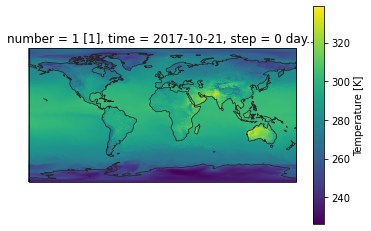

In [14]:
ax = common_features().ax
ds.t.plot(ax=ax, transform=pc)

In [16]:
from datetime import datetime
from os import remove
import matplotlib.pyplot as plt

from herbie.archive import Herbie

now = datetime.now()
today = datetime(now.year, now.month, now.day)
today_str = today.strftime('%Y-%m-%d %H:%M')


In [17]:
H = Herbie(today_str, model='hrrr', product='prs', save_dir='$TMPDIR')

H.download()

H.xarray('TMP:2 m')

🏋🏻‍♂️ Found 2022-Mar-11 00:00 UTC F00 [HRRR] [product=prs] GRIB2 file from aws and index file from aws.                                                                                                                                                       
👨🏻‍🏭 Created directory: [$TMPDIR\hrrr\20220311]
✅ Success! Downloaded HRRR from aws                 
	src: https://noaa-hrrr-bdp-pds.s3.amazonaws.com/hrrr.20220311/conus/hrrr.t00z.wrfprsf00.grib2
	dst: $TMPDIR\hrrr\20220311\hrrr.t00z.wrfprsf00.grib2
📇 Download subset: [HRRR] model [prs] product run at 2022-Mar-11 00:00 UTC F00                                                            
 cURL from https://noaa-hrrr-bdp-pds.s3.amazonaws.com/hrrr.20220311/conus/hrrr.t00z.wrfprsf00.grib2
   1: GRIB_message=616 :TMP:2 m above ground:anl


C:\Users\blayl_depgywe\BB_python\Herbie\herbie\archive.py:976: UserWarning: sorry, on windows I couldn't remove the file.
  warnings.warn("sorry, on windows I couldn't remove the file.")


<xarray.Dataset>
Dimensions:              (y: 1059, x: 1799)
Coordinates:
    time                 datetime64[ns] 2022-03-11
    step                 timedelta64[ns] 00:00:00
    heightAboveGround    float64 2.0
    latitude             (y, x) float64 21.14 21.15 21.15 ... 47.86 47.85 47.84
    longitude            (y, x) float64 237.3 237.3 237.3 ... 299.0 299.0 299.1
    valid_time           datetime64[ns] 2022-03-11
Dimensions without coordinates: y, x
Data variables:
    t2m                  (y, x) float32 291.4 291.4 291.4 ... 271.5 271.4 271.5
    gribfile_projection  object None
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP
    model:                   hrrr
    product:                 prs
    description:             High-Resolution Rapid Refresh - CONUS
    remote_grib:             https://noaa-hrrr-bdp-pds.s3.amazonaws.com/hrrr....
    local_grib:              C:\Users\blayl_depgywe\BB_python\Herbie\notebook...
    searchString:            TMP:2 m

In [19]:
H.local_grib.expand()

WindowsPath('C:/Users/blayl_depgywe/BB_python/Herbie/notebooks/issues/$TMPDIR/hrrr/20220311/hrrr.t00z.wrfprsf00.grib2')